# $$\huge \mathcal{Ejercicio \ I.}$$

La t ́ecnica conocida como LIDAR (light detection and ranging) usa la
reflexi ́on de luz de l ́aser emitida para detectar compuestos qu ́ımicos en la atm ́osfera. 

Esta
t ́ecnica ha probado ser una herramienta muy eficiente para el monitoreo de la distribuci ́on
de diversos elementos polulantes en la atm ́osfera (Sigrist, 1994).

En el archivo lidar.txt se encuentran datos medidos con a la t ́ecnica LIDAR. 

* La variable **range** es la distancia recorrida antes de que la luz sea reflejada de regreso hacia su fuente.

* La variable **logratio** es el logaritmo del cociente de la luz recibida de dos fuentes de luz l ́aser
de distinta frecuencia.

# $$\huge \mathcal 1.$$

1. A partir de los datos de lidar.txt realice un diagrama de dispersi ́on o scatter plot de range (eje x) vs. logratio (eje y). Describa la relaci ́on entre ambas variables.

In [2]:
datos <- read.table('lidar.txt', header=T)
colnames(datos)[2] <- 'logratio'
head(datos)

range,logratio
390.0,-0.05035573
391.5,-0.06009706
393.0,-0.04190091
394.5,-0.05098470
396.0,-0.05991345
397.5,-0.02842392


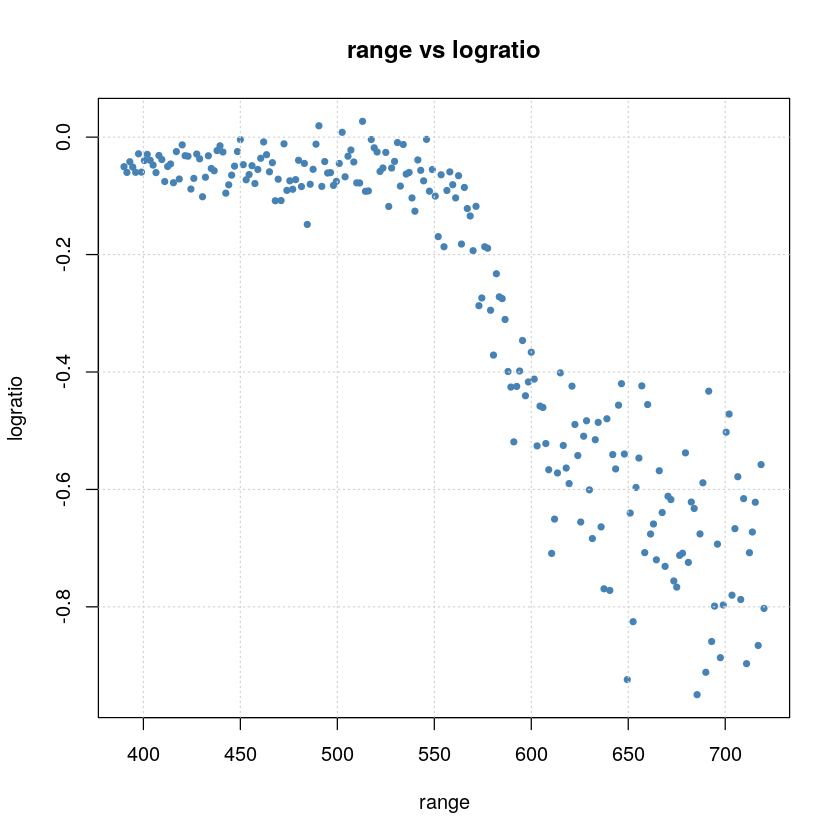

In [3]:
plot(datos, col='steelblue', pch=20, main="range vs logratio")
grid()

# $$\huge \mathcal 2.$$

2. La funci ́on de R `ksmooth` computa el estimador de ***Nadaraya-Watson*** a partir de un
conjunto de datos $(x_1, y_1), \dots ,(x_n, y_n)$ y lo eval ́ua en un conjunto de puntos intermedios.

  Mediante la funci ́on de R ksmooth estime la funci ́on de regresi ́on r que relaciona a
las variables range y logratio, tomando como variable explicativa a range, a partir
de los datos dados usando el n ́ucleo normal con ventana `h = 5`. 

  Con la funci ́ıon de
regresi ́on estimada, obtenga obtenga estimaciones de la funci ́on de regresi ́on en los valores
observados de range. 

  Grafique la funci ́on de regresi ́on estimada. 

  Repita para valores de
la ventana `h = 10, 30, 50` y superponga en el mismo plot los puntos correspondientes a las
observaciones y el valor estimado de la funci ́on de regresi ́on obtenida para `h = 5, 10, 30, 50`.

  Compare los resultados obtenidos con las 4 ventanas.

In [4]:
f.estim.5  <- ksmooth(x=datos$range, y=datos$logratio, kernel='normal', bandwidth=5)
f.estim.10 <- ksmooth(x=datos$range, y=datos$logratio, kernel='normal', bandwidth=10)
f.estim.30 <- ksmooth(x=datos$range, y=datos$logratio, kernel='normal', bandwidth=30)
f.estim.50 <- ksmooth(x=datos$range, y=datos$logratio, kernel='normal', bandwidth=50)

In [5]:
f.estim.5$y[ f.estim.5$x == 600 ]

[1] -0.410589

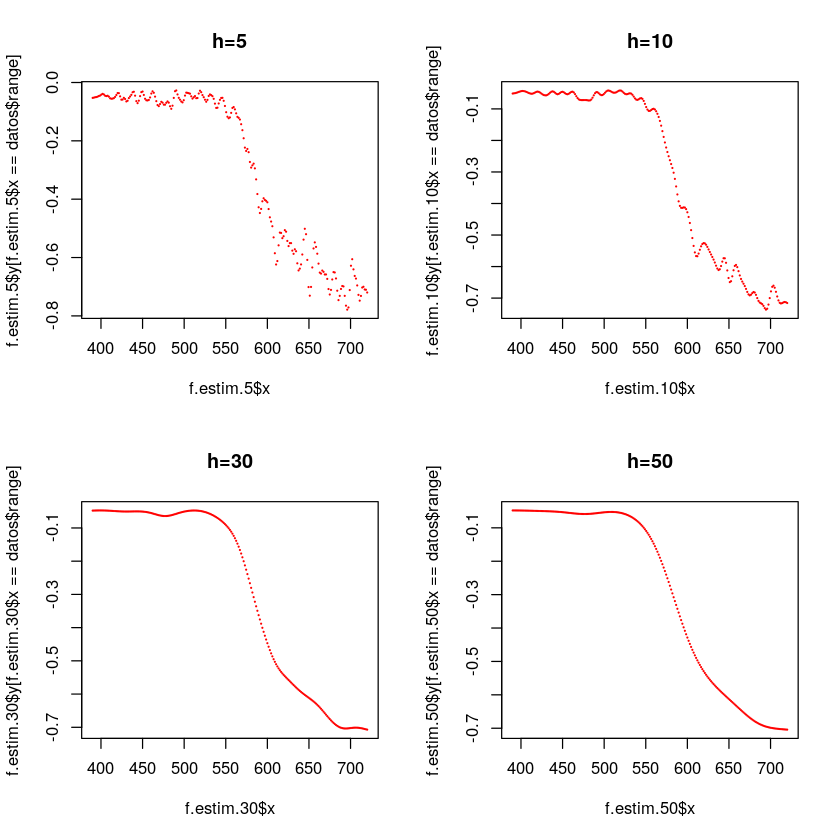

In [6]:
par(mfrow=c(2,2))
plot(f.estim.5$x, f.estim.5$y[ f.estim.5$x == datos$range ], col='red', pch=20, cex=0.2, main="h=5")
plot(f.estim.10$x, f.estim.10$y[ f.estim.10$x == datos$range ], col='red', pch=20, cex=0.2, main="h=10")
plot(f.estim.30$x, f.estim.30$y[ f.estim.30$x == datos$range ], col='red', pch=20, cex=0.2, main="h=30")
plot(f.estim.50$x, f.estim.50$y[ f.estim.50$x == datos$range ], col='red', pch=20, cex=0.2, main="h=50")

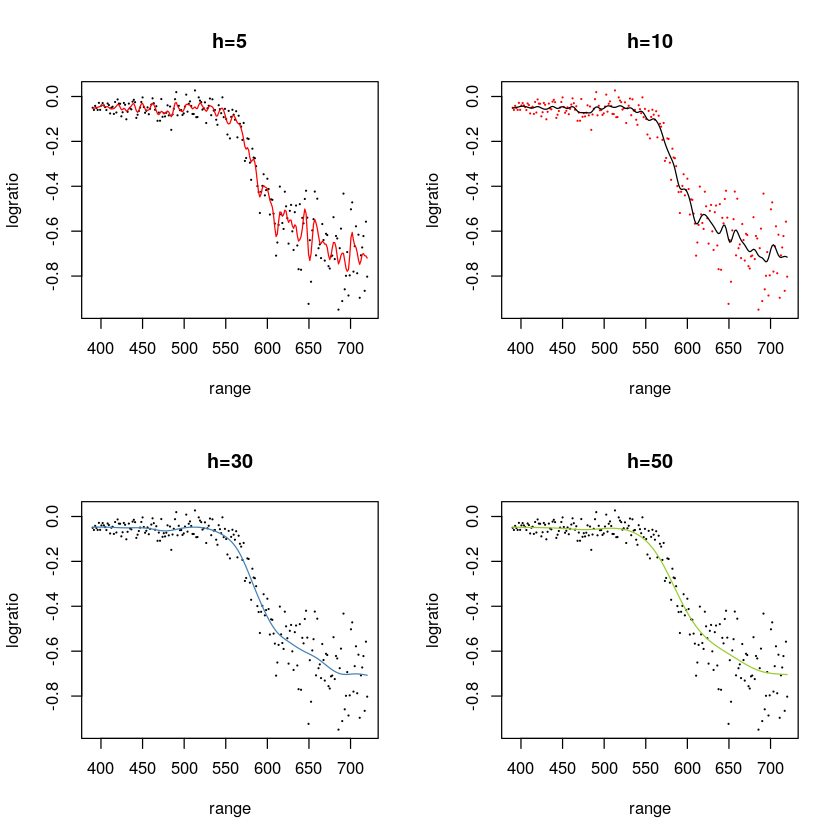

In [7]:
par(mfrow=c(2,2))
plot(datos, pch=20, cex=0.2, col='black', main="h=5")
lines(f.estim.5$x, f.estim.5$y[ f.estim.5$x == datos$range ], col='red', pch=20, cex=0.2)

plot(datos, pch=20, cex=0.2, col='red', main="h=10")
lines(f.estim.10$x, f.estim.10$y[ f.estim.10$x == datos$range ], col='black', pch=20, cex=0.2)

plot(datos, pch=20, cex=0.2, col='black', main="h=30")
lines(f.estim.30$x, f.estim.30$y[ f.estim.30$x == datos$range ], col='steelblue', pch=20, cex=0.2)

plot(datos, pch=20, cex=0.2, col='black', main="h=50")
lines(f.estim.50$x, f.estim.50$y[ f.estim.50$x == datos$range ], col='yellowgreen', pch=20, cex=0.2)

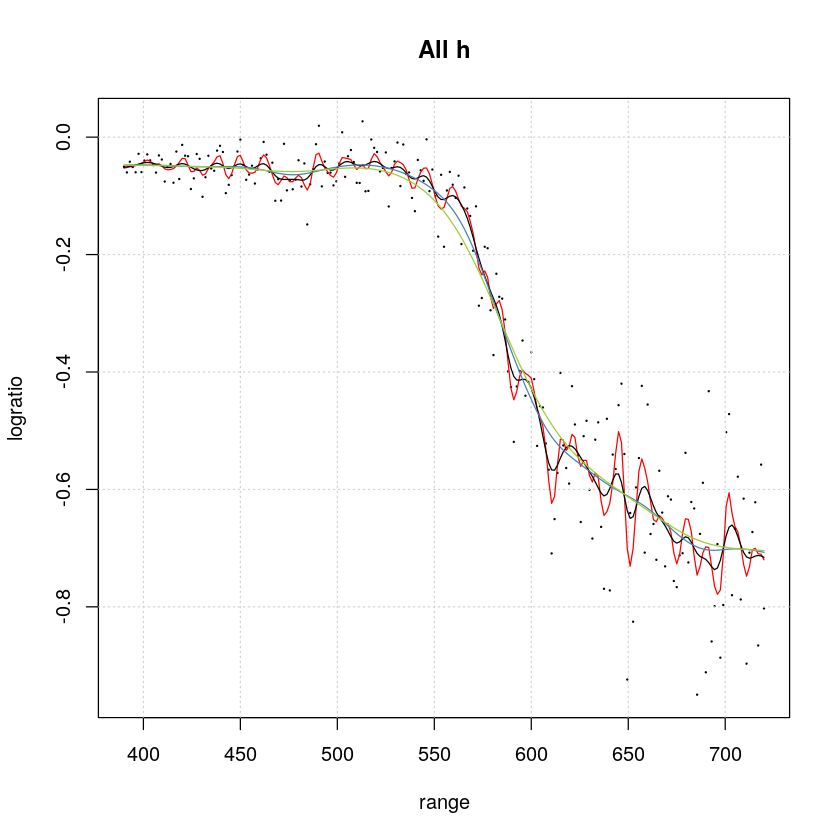

In [8]:
plot(datos, pch=20, cex=0.2, col='black', main="All h")
grid()
lines(f.estim.5$x, f.estim.5$y[ f.estim.5$x == datos$range ], type='l', col='red', pch=20, cex=0.2, main="h=5")
lines(f.estim.10$x, f.estim.10$y[ f.estim.10$x == datos$range ], col='black', pch=20, cex=0.2, main="h=10")
lines(f.estim.30$x, f.estim.30$y[ f.estim.30$x == datos$range ], col='steelblue', pch=20, cex=0.2, main="h=30")
lines(f.estim.50$x, f.estim.50$y[ f.estim.50$x == datos$range ], col='yellowgreen', pch=20, cex=0.2, main="h=50")


# $$\huge \mathcal 3.$$

3. Para cada una de las 4 estimaciones obtenidas en el item anterior compute el Error Cuadr ́atico de Predicci ́on Promediado (ECP P(h)).

  ¿Cu ́al de las 4 ventanas consideradas da el menor ECPP(h)? ¿C ́omo se puede justificar lo que est ́a ocurriendo?

In [9]:
ECPP <- function(y, h){
    return( sum((y-h)^2) )
}

In [10]:
ECPP.5  <- ECPP(datos$logratio, f.estim.5$y)
ECPP.10 <- ECPP(datos$logratio, f.estim.10$y)
ECPP.30 <- ECPP(datos$logratio, f.estim.30$y)
ECPP.50 <- ECPP(datos$logratio, f.estim.50$y)

In [11]:
ECPP.5
ECPP.10
ECPP.30
ECPP.50

[1] 0.8506018

[1] 1.141289

[1] 1.316449

[1] 1.37028

> El error aumenta a medida que la curva es más suave.
> 
> Un error muy chico no necesariamente se corresponde con una buena curva que modele la variable y.
>
> Esto es "***overfitting***"

# $$\huge \mathcal 4.$$

4. Halle mediante el criterio de Convalidaci ́on Cruzada CV (h) la ventana  ́optima. 

Realice la b ́usqueda en una grilla para valores de h entre 3 y 165 con paso 1.

Realice un plot de
h vs. CV (h).

In [12]:
hs <- seq(3, 165)

In [19]:
n <- length(datos$range)
m <- length(hs)
ECPP.h <- rep(0, m)
for(j in 1:m){
    h <- hs[j]
    for(i in 1:n){
        f.estim.h <- ksmooth(x=datos[-i, 'range'],
                             y=datos[-i, 'logratio'],
                             kernel='normal',
                             bandwidth=h,
                             x.points=datos[i, 'range'])  
        
        err.h <- ECPP(datos[i, 'logratio'], f.estim.h$y)
        ECPP.h[j] <- ECPP.h[j] + err.h
    }
    ECPP.h[j] <- ECPP.h[j] / n
}

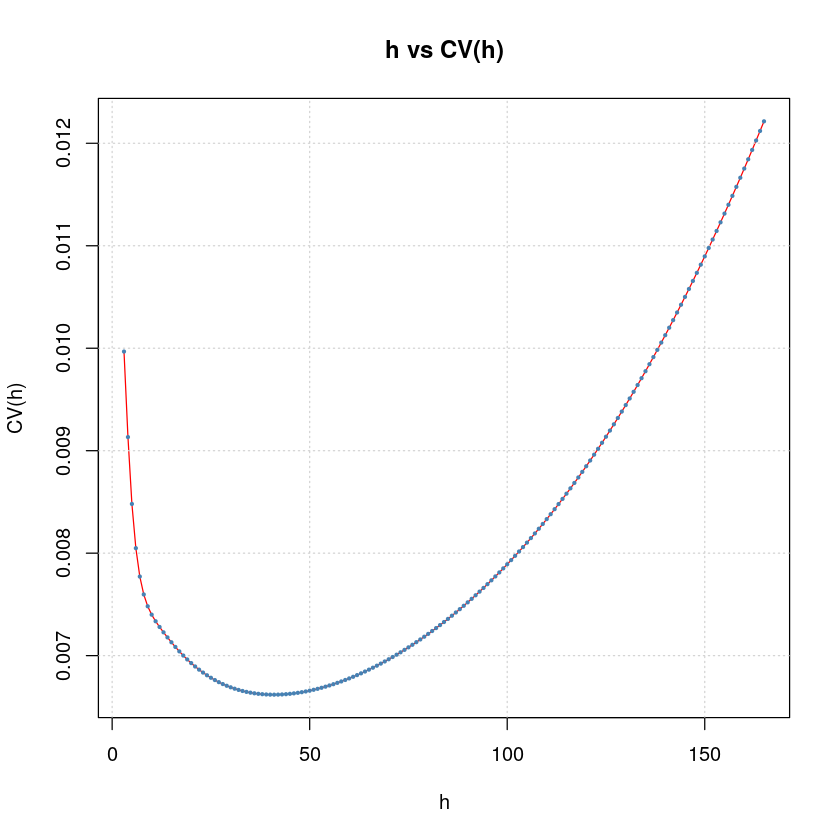

In [33]:
plot(hs, ECPP.h, pch=20, col='red', type='l', main="h vs CV(h)", xlab='h', ylab='CV(h)')
grid()
points(hs, ECPP.h, pch=20, cex=0.5, col='steelblue')

# $$\huge \mathcal 5.$$

5. Grafique los puntos observados y la funci ́on de regresi ́on estimada por el m ́etodo de
Nadaraya-Watson con la ventana  ́optima hallada.

In [38]:
best.h <- hs[which.min(ECPP.h)]
best.h

[1] 41

In [39]:
f.estim.h <- ksmooth(x=datos[, 'range'],
                     y=datos[, 'logratio'],
                     kernel='normal',
                     bandwidth=best.h,
                     x.points=datos[, 'range'])  

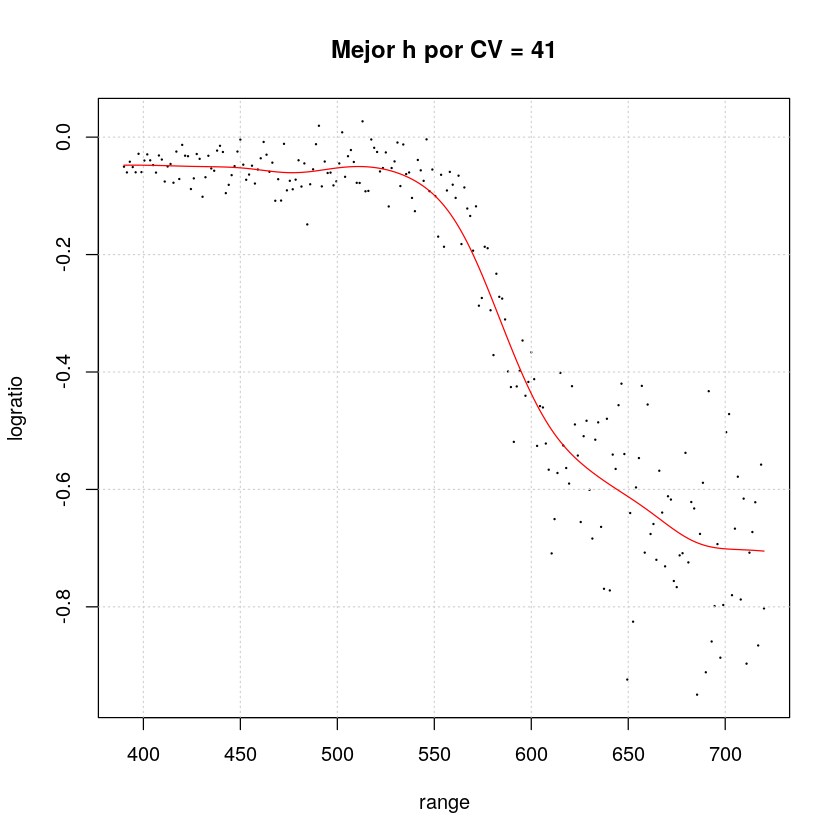

In [44]:
plot(datos, pch=20, cex=0.2, col='black', main="Mejor h por CV = 41")
grid()
lines(f.estim.h$x, f.estim.h$y[ f.estim.h$x == datos$range ], type='l', col='red', pch=20)

# $$\huge \mathcal 6.$$

6. Compute el Error Cuadr ́atico de Predicci ́on Promediado de la estimaci ́on provista por el
m ́etodo de Nadaraya-Watson con la ventana  ́optima hallada: $ECPP(h_{opt})$

In [49]:
f.estim.hopt  <- ksmooth(x=datos$range, y=datos$logratio, kernel='normal', bandwidth=best.h)
ECPP.hopt <- ECPP(datos$logratio, f.estim.hopt$y)
ECPP.hopt

[1] 1.342386

# $$\huge \mathcal 7.$$

7. Compute la Perdida de Convalidaci ́on Cruzada asociada al la estimaci ́on provista por el m ́etodo de Nadaraya-Watson con la ventana  ́optima hallada. CV (hopt)

In [46]:
min(ECPP.h)

[1] 0.006619312

# $$\huge \mathcal 8.$$

8. ¿Qu ́e se puede hacer con knn?

> Buscar la "mejor" cantidad $k$ de vecinos más cercandos usando CV

# $$\huge \mathcal{Ejercicio \ II.}$$

# $$\large  \sim  \mathcal{ Bonus Track} \sim $$